In [95]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [96]:
# Create a Model Class that inherits nn.Moduls
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  #H2 (n)-->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out  = nn.Linear(h2, out_features)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [97]:
# Pick a manual seed for randomization
torch.manual_seed(44)
# Create an instance of model
model = Model()

In [98]:
import pandas as pd
import matplotlib.pyplot as plt


In [99]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [100]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [101]:
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [102]:
# Change last column string to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)

In [103]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [104]:
x = my_df.drop('variety', axis=1)
y = my_df['variety']

In [105]:
x = x.values


In [106]:
y = y.values

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=44)

In [109]:
# convert x labels to tensor flost
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [110]:
# convert y labels to tensor long
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

In [111]:
# set the criterion  of model to measure the error , how far off the prediction are from
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer , lr = learing rate (if error doesn't go down after a bunch of iterations)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)



In [112]:
# Train our model!
# Epochs? (one run through all the training data in our network)
epochs =100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted result

  #Measure the loss/error , be high at first
  loss = criterion(y_pred, Y_train)

  # Keep Tracking of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()





Epoch: 0 and loss: 1.2163779735565186
Epoch: 10 and loss: 0.8978720307350159
Epoch: 20 and loss: 0.6104516983032227
Epoch: 30 and loss: 0.44594478607177734
Epoch: 40 and loss: 0.3541518449783325
Epoch: 50 and loss: 0.2663842439651489
Epoch: 60 and loss: 0.1824677437543869
Epoch: 70 and loss: 0.12482533603906631
Epoch: 80 and loss: 0.09509911388158798
Epoch: 90 and loss: 0.08090518414974213


Text(0.5, 0, 'Epoch')

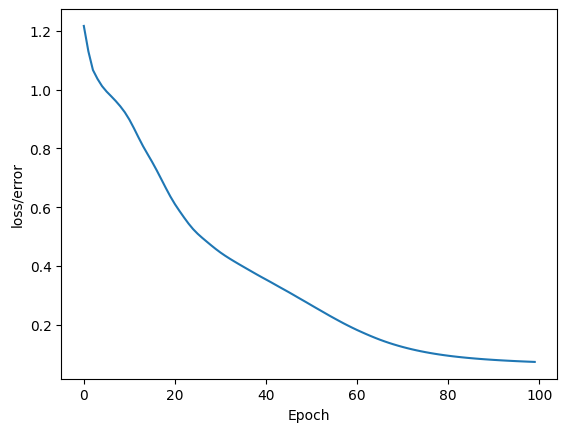

In [113]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')

In [114]:
# Evaluate Model on Test Data Set
with torch.no_grad(): # basically turn back propagation
  y_eval = model.forward(X_test) # X_test are feature from our test set
  loss = criterion(y_eval, Y_test)

In [115]:
loss

tensor(0.0271)

In [116]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_valu = model.forward(data)

    #with tell us what type of flower class our network thinks it is
    print(f'{i+1}.) {y_valu}')

    # correct or not
    if y_valu.argmax().item() == Y_test[i]:
      correct +=1
print(f'We got {correct} correct')


1.) tensor([-6.7274,  1.7774,  8.1852])
2.) tensor([  6.8552,   0.5584, -18.4324])
3.) tensor([-0.9717,  3.0297, -4.9667])
4.) tensor([-2.4880,  3.5081, -2.4750])
5.) tensor([-6.7893,  1.6191,  8.6085])
6.) tensor([  6.7435,   0.5161, -18.0336])
7.) tensor([-8.7801,  1.2005, 12.7731])
8.) tensor([-6.8808,  2.0970,  7.7696])
9.) tensor([-6.6328,  2.0591,  7.4441])
10.) tensor([-3.3575,  2.9491,  0.1631])
11.) tensor([  7.3026,   0.5089, -19.4824])
12.) tensor([-3.7928,  3.5892, -0.4264])
13.) tensor([  7.5009,   0.5233, -20.0617])
14.) tensor([-5.5855,  1.8228,  6.1899])
15.) tensor([  7.4756,   0.4822, -19.8465])
16.) tensor([  6.4411,   0.5839, -17.4376])
17.) tensor([-7.7236,  1.7853,  9.8150])
18.) tensor([-2.7971,  3.8441, -2.6573])
19.) tensor([  8.3324,   0.3813, -21.8316])
20.) tensor([-4.9903,  2.6534,  3.4929])
21.) tensor([-2.4333,  3.5840, -2.7366])
22.) tensor([-5.6390,  2.0721,  5.7524])
23.) tensor([-5.0395,  2.2856,  4.3253])
24.) tensor([-0.4465,  2.6504, -5.2752])
25.)

In [117]:
# Giving new data
new_data = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [118]:
with torch.no_grad():
  print(model(new_data))

tensor([-5.0395,  2.2856,  4.3253])
